# Select and Load IRIS Dataset #

In [1]:
import tkinter as tk
import pandas as pd
import numpy as np

from tkinter import filedialog
from datetime import datetime
def get_path():
    root = tk.Tk()
    dirname = filedialog.askopenfilename(parent=root,initialdir="/",title='Please select a directory')
    root.withdraw()
    return dirname
def load_dataset():
    dir_name = get_path()
    dataset = pd.read_csv(dir_name)
    return dataset
iris = load_dataset()

# Encode Categories inorder to move ahead with one hot encoding #

In [2]:
def encode_category(x):
    if x == "setosa":
        return 0;
    elif x == "versicolor":
        return 1
    elif x == "virginica":
        return 2
iris["species_category"] = iris["species"].apply(encode_category)
del iris["species"]   #We have assign flag values to our categorical data. No need for original column

# Perform one hot encoding #

In [3]:
iris['Setosa'] = 0
iris['Versicolor'] = 0
iris['Virginica'] = 0
labels = iris["species_category"] == 0
iris.loc[labels,'Setosa'] = 1
labels_v = iris["species_category"] == 1
iris.loc[labels_v,'Versicolor'] = 1
labels_vir = iris['species_category'] == 2
iris.loc[labels_vir,'Virginica'] = 1

# Normalize Data #

In [4]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["species_category"]=dataset["species_category"]
    return dataNorm
iris = normalize(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species_category,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,0,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,0,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,0,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,0,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0.0,0.0,1.0
146,0.555556,0.208333,0.677966,0.750000,2,0.0,0.0,1.0
147,0.611111,0.416667,0.711864,0.791667,2,0.0,0.0,1.0
148,0.527778,0.583333,0.745763,0.916667,2,0.0,0.0,1.0


# Split in train and test #

In [5]:
iris = iris.sample(frac=1).reset_index(drop=True)
train_data = iris.iloc[:112]
test_data = iris.iloc[112:]
train_features = train_data.loc[:,train_data.columns!='species_category']
train_target = train_data[['species_category']]
test_features = test_data.loc[:,train_data.columns!='species_category']
test_target = test_data[['species_category']]
train_features

,sepal_length,sepal_width,petal_length,petal_width,Setosa,Versicolor,Virginica
0,0.472222,0.083333,0.508475,0.375000,0.0,1.0,0.0
1,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
2,0.500000,0.333333,0.627119,0.458333,0.0,1.0,0.0
3,0.388889,0.416667,0.542373,0.458333,0.0,1.0,0.0
4,0.222222,0.750000,0.101695,0.041667,1.0,0.0,0.0
...,...,...,...,...,...,...,...
107,0.583333,0.375000,0.559322,0.500000,0.0,1.0,0.0
108,0.305556,0.791667,0.050847,0.125000,1.0,0.0,0.0
109,0.333333,0.166667,0.457627,0.375000,0.0,1.0,0.0
110,0.138889,0.583333,0.152542,0.041667,1.0,0.0,0.0


# Different activation function with derivatives #

In [6]:
def tanh(x):
    #t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return np.tanh(x)
    #return t
def tanh_prime(x):
    #t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return (1-tanh(x)*tanh(x))
    #return 1-t**2
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def relu(x):
    x[x<0] = 0
    return x
def relu_prime(x):
    x[x>0]=1
    x[x<=1]=0
    return x
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Generate Random Weights #

In [7]:
def generate_randomWeights():
    w1 = np.random.randn(4,6)
    w2 = np.random.randn(6,3)
    return w1,w2

# Feed Forward Function with Sigmoid, Tanh and Relu as hidden layer activation function #

In [8]:
def feed_forward_sigmoid(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = sigmoid(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o
def feed_forward_tanh(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = tanh(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o
def feed_forward_relu(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = relu(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o

# Back Propagation function for Sigmoid Tanh and Relu activation function #

In [9]:
def back_propagate_sigmoid(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo
def back_propagate_tanh(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = tanh_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo
def back_propagate_relu(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = relu_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo

# Decode test data species category to actual target variables which would be later used for accuracy checking #

In [10]:
def decode_category(x):
    if x == 0:
        return "Setosa";
    elif x == 1:
        return "Versicolor"
    elif x == 2:
        return "Virginica"
test_data["species_category"] = test_data["species_category"].apply(decode_category)

/Users/malavshastri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Training for sigmoid activation function #

In [11]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_sigmoid,w2_sigmoid = generate_randomWeights()
error_cost_sigmoid = []
learning_rate_sigmoid = 0.01
for i in range(0,5000):
    z2_sigmoid,a2_sigmoid,z3_sigmoid,o_sigmoid = feed_forward_sigmoid(train_features[features_after_addition],w1_sigmoid,w2_sigmoid)
    djdw1_sigmoid, djdw2_sigmoid = back_propagate_sigmoid(train_features, o_sigmoid ,z2_sigmoid, z3_sigmoid, a2_sigmoid, w2_sigmoid)
    loss_sigmoid = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_sigmoid)).sum(axis=1)/len(train_features))
    error_cost_sigmoid.append(loss_sigmoid)
    w1_sigmoid = w1_sigmoid-learning_rate_sigmoid*djdw1_sigmoid
    w2_sigmoid = w2_sigmoid-learning_rate_sigmoid*djdw2_sigmoid
    
#c = pd.DataFrame(o)
print(pd.DataFrame(error_cost_sigmoid))

             0
0     1.697624
1     1.125293
2     1.039310
3     1.005431
4     0.977435
...        ...
4995  0.061921
4996  0.061913
4997  0.061906
4998  0.061899
4999  0.061891

[5000 rows x 1 columns]


# Run the sigmoid model on test data #

In [12]:
z2_sigmoid,a2_sigmoid,z3_sigmoid,o_test_sigmoid = feed_forward_sigmoid(test_features[features_after_addition],w1_sigmoid,w2_sigmoid)
o_test_sigmoid['Maximum'] = o_test_sigmoid[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_sigmoid['Actual_Output'] = test_data['species_category']
o_test_sigmoid

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
112,0.999099,0.000901,6.469057e-13,Setosa,Setosa
113,0.000086,0.573724,4.261904e-01,Versicolor,Versicolor
114,0.000015,0.008234,9.917508e-01,Virginica,Virginica
115,0.000213,0.122055,8.777314e-01,Virginica,Virginica
116,0.999512,0.000488,5.703627e-12,Setosa,Setosa
117,0.000190,0.023212,9.765982e-01,Virginica,Virginica
118,0.000351,0.543659,4.559894e-01,Versicolor,Virginica
119,0.003710,0.992832,3.457708e-03,Versicolor,Versicolor
120,0.000195,0.120787,8.790171e-01,Virginica,Virginica
121,0.999912,0.000088,5.039731e-13,Setosa,Setosa


# Print iteration vs training cost graph and test data prediction accuracy #

In [13]:
itr = np.arange(0,len(error_cost_sigmoid))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Sigmoid in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_sigmoid)
from sklearn.metrics import accuracy_score
score_sigmoid = accuracy_score(o_test_sigmoid['Maximum'],o_test_sigmoid['Actual_Output'])*100
print("Test Data Accuracy For Sigmoid: ", score_sigmoid, "%")
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'])
print(confusion)

Test Data Accuracy For Sigmoid:  94.73684210526315 %
F1 Score is  93.05114638447972 %
[[13  0  0]
 [ 1  6  1]
 [ 0  0 17]]


## Printing the confusion matrix ##

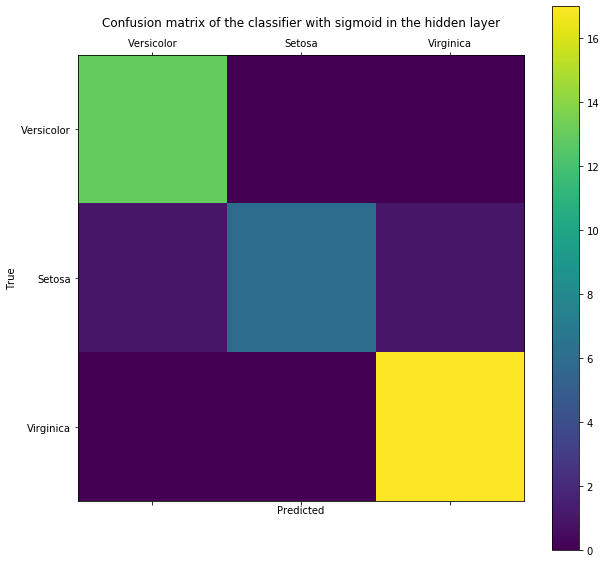

In [14]:
#Reference taken from internet.
plot = plt.figure(figsize=(10,10))
axis = plot.add_subplot(111)
cax = axis.matshow(confusion)
plt.title('Confusion matrix of the classifier with sigmoid in the hidden layer')
plot.colorbar(cax)
axis.set_xticklabels([''] + labels)
axis.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training for Tanh activation function #

In [15]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_tanh,w2_tanh = generate_randomWeights()
error_cost_tanh = []
learning_rate_tanh = 0.01
for i in range(0,5000):
    z2_tanh,a2_tanh,z3_tanh,o_tanh = feed_forward_tanh(train_features[features_after_addition],w1_tanh,w2_tanh)
    djdw1_tanh, djdw2_tanh = back_propagate_tanh(train_features, o_tanh ,z2_tanh, z3_tanh, a2_tanh, w2_tanh)
    loss_tanh = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_tanh)).sum(axis=1)/len(train_features))
    error_cost_tanh.append(loss_tanh)
    w1_tanh = w1_tanh-learning_rate_tanh*djdw1_tanh
    w2_tanh = w2_tanh-learning_rate_tanh*djdw2_tanh
    
#c = pd.DataFrame(o)
print(pd.DataFrame(error_cost_tanh))

             0
0     2.557880
1     1.119792
2     0.927857
3     0.867722
4     0.812939
...        ...
4995  0.105162
4996  0.101389
4997  0.098111
4998  0.095190
4999  0.092613

[5000 rows x 1 columns]


# Run the Tanh model on test data #

In [16]:
z2_tanh,a2_tanh,z3_tanh,o_test_tanh = feed_forward_tanh(test_features[features_after_addition],w1_tanh,w2_tanh)
o_test_tanh['Maximum'] = o_test_tanh[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_tanh['Actual_Output'] = test_data['species_category']
o_test_tanh

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
112,9.991362e-01,0.000864,2.482827e-21,Setosa,Setosa
113,4.952126e-07,0.471040,5.289597e-01,Virginica,Versicolor
114,1.132898e-07,0.050401,9.495989e-01,Virginica,Virginica
115,6.748858e-07,0.166700,8.332997e-01,Virginica,Virginica
116,9.998147e-01,0.000185,1.363508e-18,Setosa,Setosa
117,4.684127e-07,0.080919,9.190802e-01,Virginica,Virginica
118,1.714719e-06,0.446594,5.534038e-01,Virginica,Virginica
119,8.334488e-04,0.998889,2.771472e-04,Versicolor,Versicolor
120,5.946205e-07,0.159981,8.400189e-01,Virginica,Virginica
121,9.991145e-01,0.000885,5.048016e-23,Setosa,Setosa


# Print iteration vs training cost graph and test data prediction accuracy for Tanh Activation Function #

Test Data Accuracy For Tanh:  94.73684210526315 %
F1 Score is  92.308975642309 %
[[13  0  0]
 [ 1  5  0]
 [ 0  1 18]]


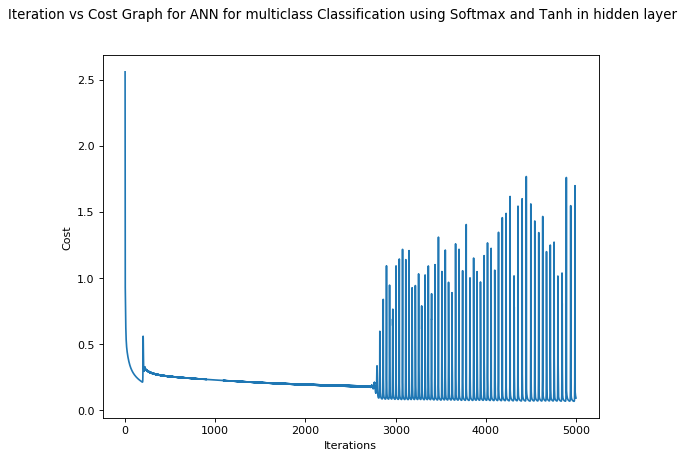

In [17]:
itr = np.arange(0,len(error_cost_tanh))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Tanh in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_tanh)
from sklearn.metrics import accuracy_score
score_tanh = accuracy_score(o_test_tanh['Maximum'],o_test_tanh['Actual_Output'])*100
print("Test Data Accuracy For Tanh: ", score_tanh, "%")
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_tanh['Maximum'], o_test_tanh['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_tanh['Maximum'], o_test_tanh['Actual_Output'])
print(confusion)


# Plotting the confusion matrix for tanh in hidden layer#

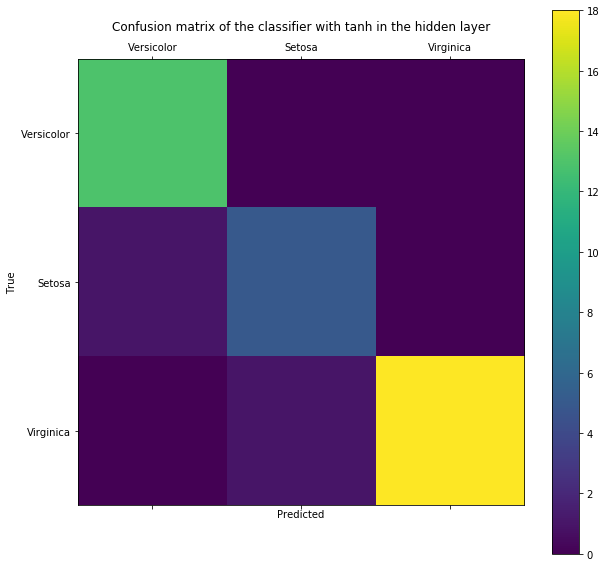

In [18]:
#Reference taken from internet.
plot = plt.figure(figsize=(10,10))
axis = plot.add_subplot(111)
cax = axis.matshow(confusion)
plt.title('Confusion matrix of the classifier with tanh in the hidden layer')
plot.colorbar(cax)
axis.set_xticklabels([''] + labels)
axis.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Training for Relu activation function #

In [19]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_relu,w2_relu = generate_randomWeights()
error_cost_relu = []
learning_rate_relu = 0.01
for i in range(0,5000):
    z2_relu,a2_relu,z3_relu,o_relu = feed_forward_relu(train_features[features_after_addition],w1_relu,w2_relu)
    djdw1_relu, djdw2_relu = back_propagate_relu(train_features, o_relu ,z2_relu, z3_relu, a2_relu, w2_relu)
    loss_relu = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_relu)).sum(axis=1)/len(train_features))
    error_cost_relu.append(loss_relu)
    w1_relu = w1_relu-learning_rate_relu*djdw1_relu
    w2_relu = w2_relu-learning_rate_relu*djdw2_relu
    
#c = pd.DataFrame(o)
print(pd.DataFrame(error_cost_relu))

             0
0     1.266203
1     1.160800
2     1.105811
3     1.073995
4     1.053356
...        ...
4995  0.472879
4996  0.472876
4997  0.472873
4998  0.472870
4999  0.472867

[5000 rows x 1 columns]


# Run the Relu model on test data #

In [20]:
z2_relu,a2_relu,z3_relu,o_test_relu = feed_forward_relu(test_features[features_after_addition],w1_relu,w2_relu)
o_test_relu['Maximum'] = o_test_relu[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_relu['Actual_Output'] = test_data['species_category']
o_test_relu

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
112,4.075072e-01,0.328922,0.263571,Setosa,Setosa
113,5.942834e-08,0.329767,0.670233,Virginica,Versicolor
114,3.906302e-07,0.315123,0.684876,Virginica,Virginica
115,1.956845e-05,0.580365,0.419616,Versicolor,Virginica
116,9.959324e-01,0.002648,0.001420,Setosa,Setosa
117,2.534002e-02,0.660081,0.314579,Versicolor,Virginica
118,9.019607e-06,0.539136,0.460855,Versicolor,Virginica
119,1.851616e-01,0.606028,0.208811,Versicolor,Versicolor
120,3.416312e-07,0.618996,0.381004,Versicolor,Virginica
121,9.980821e-01,0.001445,0.000473,Setosa,Setosa


# Print iteration vs training cost graph and test data prediction accuracy for Relu Activation Function #

Test Data Accuracy For Relu:  63.1578947368421 %
F1 Score is  60.83916083916085 %
[[14  0  0]
 [ 0  4 12]
 [ 0  2  6]]


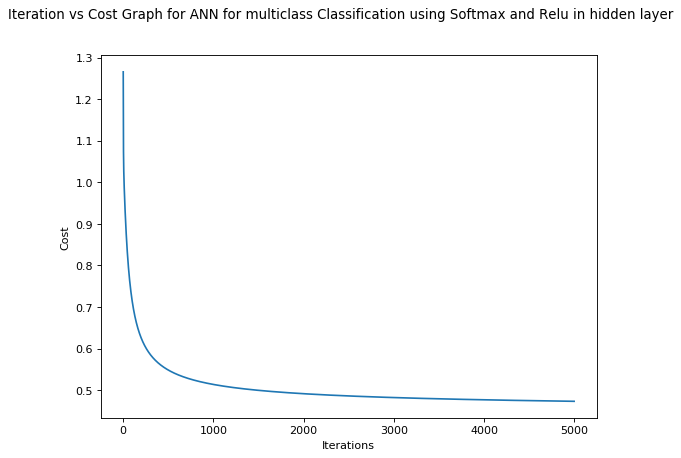

In [21]:
itr = np.arange(0,len(error_cost_relu))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Relu in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_relu)
from sklearn.metrics import accuracy_score
score_relu = accuracy_score(o_test_relu['Maximum'],o_test_relu['Actual_Output'])*100
print("Test Data Accuracy For Relu: ", score_relu, "%")
o_test_relu
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_relu['Maximum'], o_test_relu['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_relu['Maximum'], o_test_relu['Actual_Output'])
print(confusion)


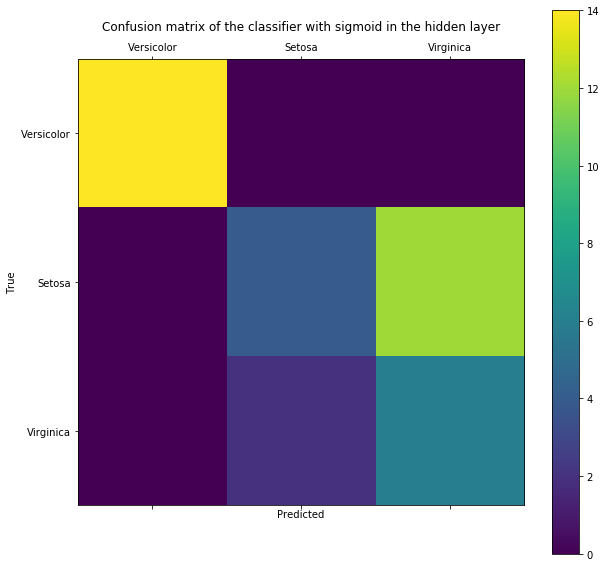

In [22]:
#Reference taken from internet.
plot = plt.figure(figsize=(10,10))
axis = plot.add_subplot(111)
cax = axis.matshow(confusion)
plt.title('Confusion matrix of the classifier with sigmoid in the hidden layer')
plot.colorbar(cax)
axis.set_xticklabels([''] + labels)
axis.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()